In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## データの読み込み

In [2]:
df = pd.read_csv('train.tsv', sep='\t')

In [3]:
df = df.set_index('id')

In [4]:
df.shape

(1169042, 21)

In [5]:
df.head()

,click,I1,I2,C1,C2,C3,C4,C5,C6,I3,...,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14
id,,,,,,,,,,,,,,,,,,,,,
0,0,5,20,421256035,2377199148,2696211399,2298910535,3133252034,1509930964,1,...,0,0,0,0,0,0,NaN,NaN,NaN,780.0
1,0,5,20,2581703001,2589684548,1998340283,2411205997,3202148071,1238839469,0,...,1,1,0,0,0,0,NaN,NaN,NaN,0.0
2,0,5,20,2581703001,1862037199,2448089184,2411205997,1107442947,3668889797,2,...,0,0,0,0,1,0,NaN,NaN,NaN,117.0
3,0,5,20,421256035,3874378935,1658216424,2298910535,2321672976,1509930964,1,...,0,0,0,0,0,0,6.0,6.0,34501.0,390.0
4,1,5,20,421256035,3874378935,1892769125,2411205997,2321672976,1509930964,1,...,0,0,0,0,0,0,1.0,31.0,12557.0,390.0


In [6]:
df.tail()

,click,I1,I2,C1,C2,C3,C4,C5,C6,I3,...,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14
id,,,,,,,,,,,,,,,,,,,,,
1169037,0,4,19,421256035,3874378935,1892769125,2411205997,2321672976,1509930964,1,...,0,0,0,0,0,0,2.0,2.0,9351.0,390.0
1169038,0,4,19,421256035,3874378935,98956388,1332932160,2321672976,1509930964,1,...,0,0,0,0,0,1,623.0,35.0,248.0,390.0
1169039,0,4,19,421256035,3874378935,98956388,1332932160,2321672976,1509930964,1,...,0,0,0,0,0,0,4.0,2.0,646404.0,390.0
1169040,0,4,19,3651044092,1862037199,2448089184,2411205997,4028731966,2068230268,1,...,0,0,0,0,0,0,NaN,NaN,NaN,13.0
1169041,0,4,19,421256035,3263006221,1317633392,1825710598,2456844420,1479325723,2,...,0,0,0,0,0,0,9.0,1.0,1043452.0,325.0


In [7]:
df.columns

Index(['click', 'I1', 'I2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'I3', 'I4',
       'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'I11', 'I12', 'I13', 'I14'],
      dtype='object')

In [8]:
df.isna().sum()

click         0
I1            0
I2            0
C1            0
C2            0
C3            0
C4            0
C5            0
C6            0
I3            0
I4            0
I5            0
I6            0
I7            0
I8            0
I9            0
I10           0
I11      187288
I12      187288
I13      187288
I14       39620
dtype: int64

## 各カラムの確認

In [9]:
#クリックの有無、圧倒的にクリックをしていない人が多いので学習時にはアンダーウェイティング等の工夫が必要
df.click.value_counts()

0    1081295
1      87747
Name: click, dtype: int64

In [10]:
#各データ均等に散らばっているので、曜日を数値化したもの？
# 今回のデータは1週間分のデータで一レコードに付き１回の広告表示を意味する
df.I1.value_counts()

5    175972
2    168536
3    167262
6    167145
1    166091
4    164105
0    159931
Name: I1, dtype: int64

In [11]:
# I1が日付データならこちらは時間データのような気がする
df.I2.value_counts()

17    67232
16    66408
18    63176
19    60562
20    60523
13    57088
15    56928
8     55292
14    55284
6     53954
7     53815
9     53664
5     53654
12    53080
11    52913
10    52793
4     44808
21    44698
3     36334
22    32240
2     29714
23    23318
1     22304
0     19260
Name: I2, dtype: int64

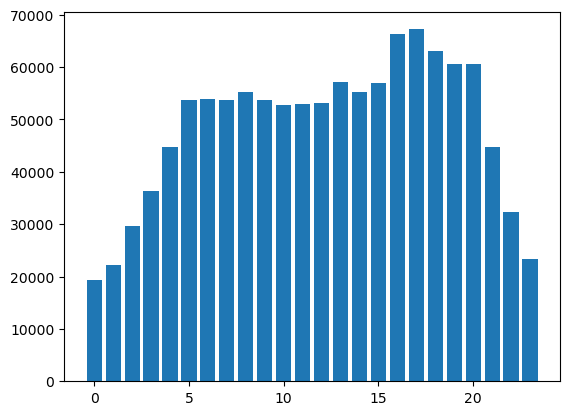

In [12]:
plt.bar(np.arange(0,24), df.I2.value_counts()[np.arange(0,24)])
plt.show()

In [13]:
# 一致を確認できたので日付・時間仮説の可能性はある
df.I1.value_counts().sum(), df.I2.value_counts().sum()

(1169042, 1169042)

#### 顧客属性、匿名化されているカラム。情報の質が違う

In [14]:
# 匿名化している変数,CはCustermerの意味？わからん
df.C1.value_counts()

421256035     766892
2581703001    227591
3651044092     53902
2686811630     33122
2387281372     30345
2541535031     21625
1111213504     15559
1045405899     14878
2068315619      5128
Name: C1, dtype: int64

(array([766892.,  14878.,  15559.,      0.,      0.,   5128., 279561.,
         33122.,      0.,  53902.]),
 array([4.21256035e+08, 7.44234841e+08, 1.06721365e+09, 1.39019245e+09,
        1.71317126e+09, 2.03615006e+09, 2.35912887e+09, 2.68210767e+09,
        3.00508648e+09, 3.32806529e+09, 3.65104409e+09]),
 <BarContainer object of 10 artists>)

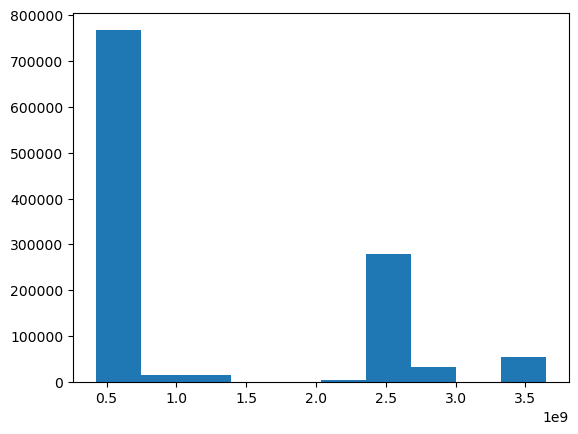

In [15]:
# ほとんど解釈の余地がない意味のない動画となっている
plt.hist(df.C1)

In [16]:
df.C2.value_counts()

3874378935    301238
1862037199    259814
2589684548    143799
1537671376    108640
1088910726     97224
               ...  
1929708017         1
1720137283         1
1332932160         1
2872626515         1
155193773          1
Name: C2, Length: 171, dtype: int64

In [17]:
df.C3.value_counts()

1892769125    159439
2448089184    156193
3260269773     75530
1998340283     75144
98956388       73953
               ...  
2953239192         1
3116340955         1
3687488267         1
2711384551         1
2177228600         1
Name: C3, Length: 347, dtype: int64

In [18]:
df.C4.value_counts()

2411205997    598220
2298910535    311713
1332932160    162183
1825710598     78003
400122826      12993
3954817824      5785
1404944795       145
Name: C4, dtype: int64

In [19]:
df.C5.value_counts()

2321672976    401591
1410458339    140362
476085660     110843
2456844420     44425
3202148071     23032
               ...  
1050927933         5
3203701033         1
2937689798         1
1529425543         1
3667762485         1
Name: C5, Length: 223, dtype: int64

In [20]:
df.C6.value_counts()

1509930964    422105
3668889797    199356
2068230268    184139
3111151614    123799
1479325723     79423
147733495      39550
3684013252     31936
1769722553     27584
1238839469     23338
2798684489      9980
3016268466      7650
4161523369      6931
1410751928      6815
2141877921      5872
1991667031       421
1802588585       143
Name: C6, dtype: int64

In [21]:
# ０、１、２の3変数、０が異様に少ない
df.I3.value_counts()

1    564628
2    452125
0    152289
Name: I3, dtype: int64

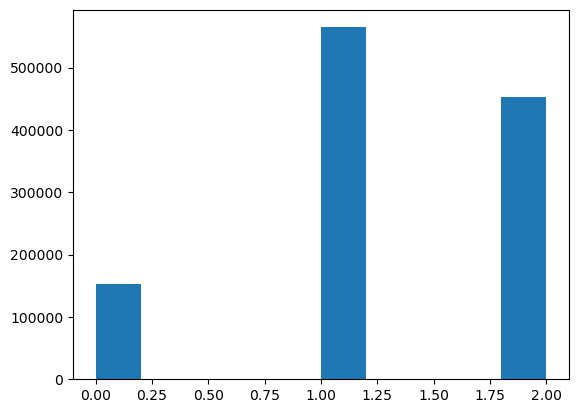

In [22]:
plt.hist(df.I3)
plt.show()

In [23]:
# ０、１、２の３変数。０が異様に多い
df.I4.value_counts()

0    765429
1    259814
2    143799
Name: I4, dtype: int64

In [24]:
# ９２％が０の値,流入経路とか？滞在時間？
print(df.I5.value_counts())
df.I5.value_counts()[0]/df.index.size

0       1076860
1         52785
2         15658
3          8219
4          3529
         ...   
138           1
304           1
223           1
1964          1
160           1
Name: I5, Length: 276, dtype: int64


0.9211474010343512

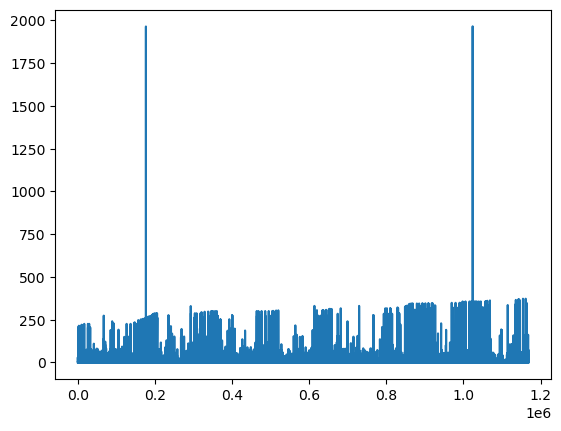

In [25]:
# 外れ値感のあるデータがいくつか確認できる
plt.plot(df.I5)
plt.show()

In [26]:
# ほとんど０の値
df.I6.value_counts()

0    1046582
1     122460
Name: I6, dtype: int64

In [27]:
# I6と何か違うの？、主成分分析で合成？抜く？
df.I7.value_counts()

0    1101862
1      67180
Name: I7, dtype: int64

In [28]:
df.I８.value_counts()

0    1066785
1     102257
Name: I8, dtype: int64

In [29]:
df.I9.value_counts()

0    745096
1    423946
Name: I9, dtype: int64

In [30]:
df.I10.value_counts()

0    724592
1    444450
Name: I10, dtype: int64

In [31]:
df.I11.value_counts()

0.0        100446
1.0         46437
2.0         40932
3.0         35472
4.0         31719
            ...  
5511.0          1
9059.0          1
6241.0          1
9344.0          1
22022.0         1
Name: I11, Length: 13352, dtype: int64

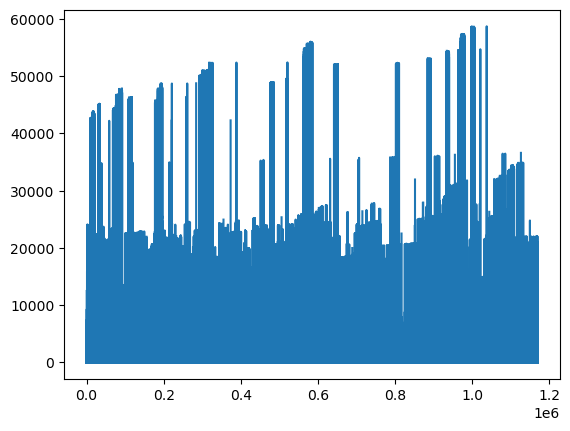

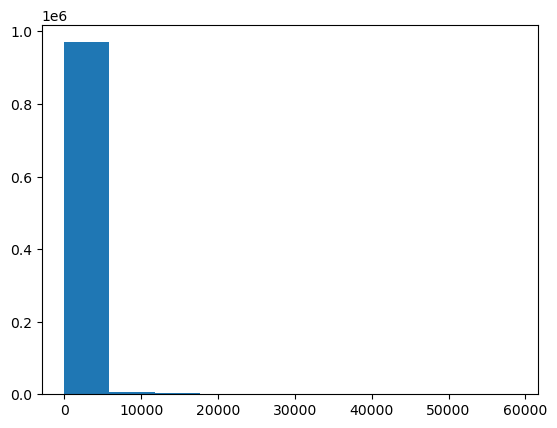

In [32]:
plt.plot(df.I11)
plt.show()
plt.hist(df.I11)
plt.show()

In [33]:
df[['I11','I5']].corr()

,I11,I5
I11,1.000000,0.082021
I5,0.082021,1.000000


## 広告のクリック予測でのドメイン知識を蓄える。重要そうな特徴量とか、予測に必要となる体系的な知識

- 広告のトピック（アートエンタメや旅行、自動車等）によってクリック率は変わる
- 広告には種類がある
    - リスティング広告＝検索結果と共に表示される報告、購買意欲のあるユーザーにアプローチする方法
    - ディスプレイ広告＝WEBサイトの広告枠,潜在顧客に広くアプローチする方法
    - youtube,LINE等の広告
- 適切なペルソナの設定
- 考えられるカラム
    - C軍について
        - 通信地域
        - 
    - I３以降のカラムについて
        - 広告の形態
        - デバイス別
        - OSの種類
        - 国別
        - 業界番号別
        - リスティング広告において表示されているページ数
        - 滞在時間
        - Wifi環境
        - 

### アイデア
IDでグルーピングしてクリック率を出すと業界別と似たような傾向がでそう
周期性の確認、時系列分析になる可能性あり


## 相関関係や散布図の確認

In [34]:
df.columns

Index(['click', 'I1', 'I2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'I3', 'I4',
       'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'I11', 'I12', 'I13', 'I14'],
      dtype='object')

In [40]:
%time
# sns.pairplot(df, hue='click')
# plt.show()

CPU times: user 6 µs, sys: 3 µs, total: 9 µs
Wall time: 15 µs


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f9e80ae3c10> (for post_execute):


KeyboardInterrupt: 

In [36]:
df.corr()

,click,I1,I2,C1,C2,C3,C4,C5,C6,I3,...,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14
click,1.000000,0.004251,0.014690,-0.109711,0.015309,0.015876,-0.015348,0.014908,0.044230,0.024434,...,0.067730,0.077138,-0.032788,-0.048059,-0.072510,-0.119571,-0.033163,0.080368,-0.080745,0.150634
I1,0.004251,1.000000,0.006161,-0.016385,-0.008311,0.004520,0.000831,0.007468,0.008493,-0.000191,...,0.004130,0.005092,-0.009637,-0.007289,0.004432,-0.003520,-0.001644,0.000306,-0.011248,0.008116
I2,0.014690,0.006161,1.000000,-0.084029,0.003584,0.013435,-0.025143,0.007481,0.017178,0.046471,...,0.002932,-0.005533,-0.017203,-0.023848,-0.004743,-0.030510,-0.007229,0.010175,-0.062632,0.004490
C1,-0.109711,-0.016385,-0.084029,1.000000,-0.161042,-0.061543,0.128671,-0.123037,0.002704,-0.128633,...,-0.023419,-0.051579,0.150254,0.207897,0.069421,0.079466,0.021709,-0.049092,0.360023,-0.284370
C2,0.015309,-0.008311,0.003584,-0.161042,1.000000,-0.371234,-0.080632,0.159962,-0.317284,-0.369218,...,0.012107,-0.048632,-0.036067,-0.039951,-0.073232,-0.041463,-0.054420,-0.032488,-0.148437,0.009568
C3,0.015876,0.004520,0.013435,-0.061543,-0.371234,1.000000,0.113997,-0.101838,0.162477,0.218511,...,0.007797,0.034369,0.018004,0.010495,0.039243,-0.011880,-0.047545,0.029884,0.020977,0.036660
C4,-0.015348,0.000831,-0.025143,0.128671,-0.080632,0.113997,1.000000,0.024575,0.007714,-0.082031,...,0.005198,0.002233,0.020009,0.016437,0.020494,-0.017786,0.001350,-0.021322,0.103798,0.108841
C5,0.014908,0.007468,0.007481,-0.123037,0.159962,-0.101838,0.024575,1.000000,-0.325312,-0.163819,...,0.024310,-0.016688,-0.267131,-0.192350,-0.007020,-0.025431,0.002627,-0.018648,-0.133662,0.080259
C6,0.044230,0.008493,0.017178,0.002704,-0.317284,0.162477,0.007714,-0.325312,1.000000,0.240190,...,-0.004703,0.120097,-0.061517,-0.085262,-0.005264,0.028309,0.151694,0.093628,0.293042,-0.078454
I3,0.024434,-0.000191,0.046471,-0.128633,-0.369218,0.218511,-0.082031,-0.163819,0.240190,1.000000,...,-0.009983,-0.022324,0.039202,0.017115,-0.062324,-0.028228,0.027493,0.054755,0.035362,0.002192


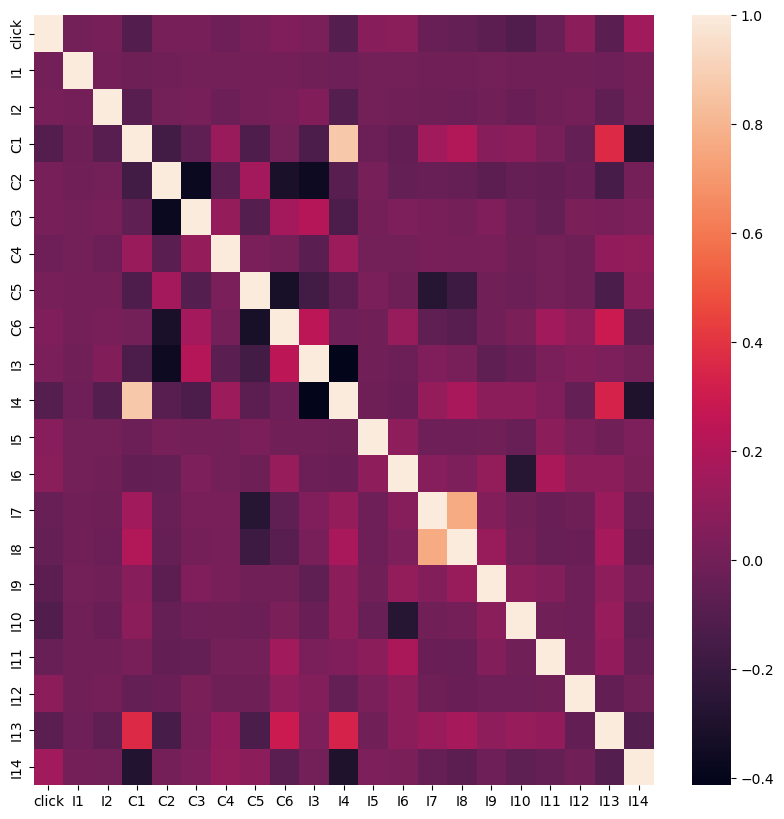

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

## クラスタリング、次元削減

## 利用するモデルの検討

## 評価指標